In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
!pip3 install koreanize-matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import koreanize_matplotlib

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [5]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [6]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


### 📌 Q1. 연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [7]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [8]:
# map함수를 이용해 정수형으로 저장된 값들을 문자열로 변경 후 "연령대"라는 새로운 열 추가
df["연령대"] = df['연령대코드(5세단위)'].map(age_code)

In [9]:
# describe() => 데이터를 요약해주는 함수
pd.DataFrame(df.groupby("연령대")["허리둘레"].describe())

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


### 📌Q2. "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [10]:
df1 = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]
df1.head()

,음주여부,흡연상태,연령대코드(5세단위),성별코드
0,0.0,3.0,13,1
1,0.0,1.0,8,2
2,0.0,1.0,8,1
3,1.0,1.0,12,2
4,0.0,3.0,8,1


In [11]:
corr = df1.corr(method='pearson')
corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


In [12]:
#상위삼각인덱싱
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

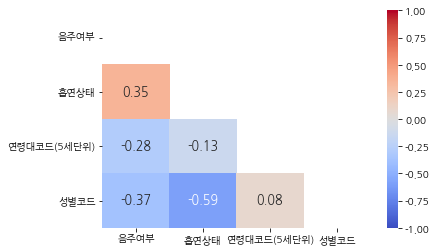

In [13]:
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size' : 12.5},
            vmin=-1, vmax=1, mask=mask)

### 📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

In [14]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [15]:
df["음주"] = df['음주여부'].map(drink)
df["흡연"] = df['흡연상태'].map(smoke)

In [16]:
# groupby 사용
# size() => 그룹 별 행 갯수 세기
# unstack() => matrix(행렬) 형태로 전환
df.groupby(['음주', '흡연']).size().unstack()

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


In [17]:
# pivot_table 사용
df.pivot_table(index=[df.음주], values=['흡연'], columns=df.흡연, aggfunc='count')

흡연                
흡연       끊음    흡연안함     흡연중
음주                         
마심   120779  213743  162166
안마심   55334  394503   52845

In [18]:
# crosstab 사용
pd.crosstab(index = [df.음주], columns = df.흡연)

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


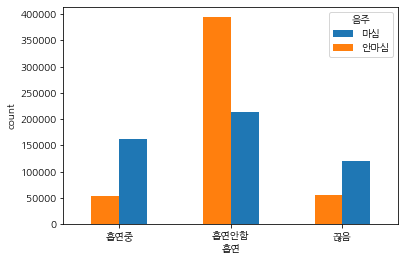

In [29]:
pd.crosstab(index = [df.흡연], columns = df.음주).plot.bar(rot=0, ylabel='count').invert_xaxis()

### 📌 Q4. 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

In [20]:
df_obesity = df[df["체중(5Kg 단위)"] >= 120][["총콜레스테롤", "감마지티피", "음주", "흡연"]]
df_obesity

,총콜레스테롤,감마지티피,음주,흡연
1219,182.0,47.0,안마심,흡연중
2309,107.0,19.0,안마심,흡연중
3497,214.0,111.0,마심,흡연중
3685,218.0,58.0,안마심,끊음
5788,194.0,35.0,안마심,흡연안함
...,...,...,...,...
996544,244.0,76.0,마심,흡연중
996828,194.0,82.0,마심,흡연중
997152,208.0,165.0,안마심,흡연안함
997414,197.0,62.0,안마심,흡연중


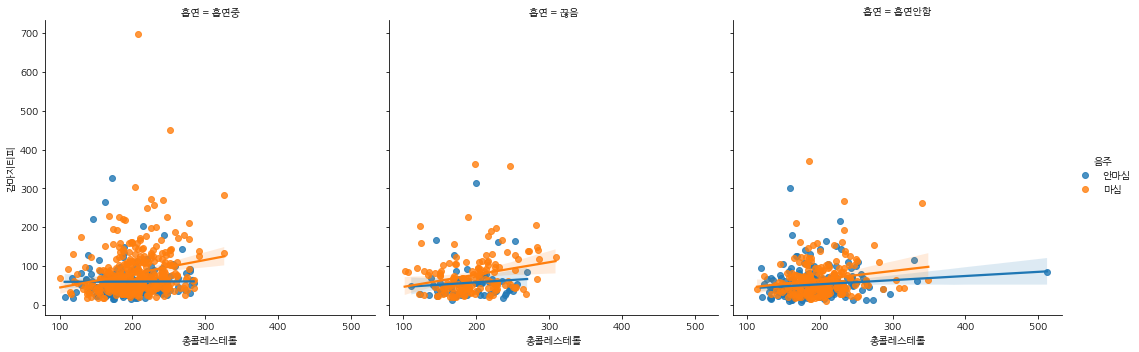

In [21]:
sns.lmplot(x='총콜레스테롤', y='감마지티피', col='흡연', hue='음주', height=5, data=df_obesity)

### 📌 Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

서브플롯으로 시각화하여 표현해주세요.

In [22]:
# isin() => 일치하는 요소 확인
vision = (df["시력(좌)"].isin([9.9])) | (df["시력(우)"].isin([9.9]))

In [23]:
df_vision = df[~vision][['연령대','성별코드','시력(좌)', '시력(우)']]
df_vision

,연령대,성별코드,시력(좌),시력(우)
0,60~64세,1,1.0,1.2
1,35~39세,2,1.2,1.0
2,35~39세,1,1.0,0.8
3,55~59세,2,0.9,1.0
4,35~39세,1,1.5,1.5
...,...,...,...,...
999995,40~44세,2,1.5,1.5
999996,40~44세,2,1.2,1.5
999997,55~59세,2,0.2,1.0
999998,50~54세,1,0.8,0.9


In [24]:
df_left = df_vision.groupby(['연령대', '성별코드'])['시력(좌)'].mean().unstack()
df_left

성별코드,1,2
연령대,,
20~24세,1.092213,0.989032
25~29세,1.108857,1.016270
30~34세,1.116939,1.029007
35~39세,1.137394,1.057828
40~44세,1.115274,1.027355
45~49세,1.052993,0.955158
50~54세,1.002289,0.909823
55~59세,0.954886,0.860990
60~64세,0.880871,0.787723


In [25]:
df_right = df_vision.groupby(['연령대', '성별코드'])['시력(우)'].mean().unstack()
df_right

성별코드,1,2
연령대,,
20~24세,1.083185,0.982924
25~29세,1.103328,1.005915
30~34세,1.112457,1.021342
35~39세,1.134962,1.050359
40~44세,1.115097,1.019675
45~49세,1.053015,0.948959
50~54세,1.001541,0.906133
55~59세,0.956144,0.859704
60~64세,0.885796,0.786190


In [26]:
import matplotlib.pyplot as plt

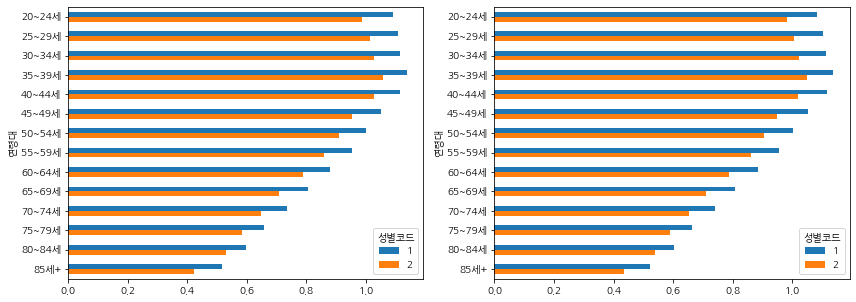

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df_left.plot(kind='barh', rot=0, ax=ax[0]).invert_yaxis()
df_right.plot(kind='barh', rot=0, ax=ax[1]).invert_yaxis()